In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mutua\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Authinitial Keys
consumerKey = 'NXcySLTzvf96UZfY5zRVdpRxX'
consumerSecret = 'dJSwG1mopqefVZ1VvAeTr9y64zy1SQHdmtjALUyfPTAuCuMdO5'
accessToken = '1346038574010028033-Trz5KkbXmXMGGYpVviiJUFUsZjMaK6'
accessTokenSecret = 'PQ8q2riFNKfKNX3N6saFz0d7JeadG8qgsHs2eMf8wfL0p'

# Authentication
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  SafaricomPLC
Please enter how many tweets to analyze:  500


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  500
positive number:  258
negative number:  81
neutral number:  161


In [6]:
tweet_list

,0
0,@SafaricomPLC Nimeskia tu kutumia huyo custome...
1,@SafaricomPLC So huwa mnasikiza conversation ...
2,RT @Asmali77: My Mombasa folks. I wanna cheer ...
3,@Ohta_Ryota @KoneMoheavy @SafaricomPLC Try ##6...
4,@brianwairimu Hi there. Yes we can. We will re...
...,...
495,"@mauayako Hi Miss Habesha, avoid sharing your ..."
496,RT @Asmali77: My Mombasa folks. I wanna cheer ...
497,RT @Asmali77: My Mombasa folks. I wanna cheer ...
498,RT @PeterNdegwa_: As I celebrate one year at @...


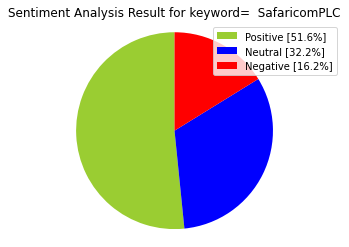

In [7]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [8]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@SafaricomPLC Nimeskia tu kutumia huyo custome...,@SafaricomPLC Nimeskia tu kutumia huyo custome...
1,@SafaricomPLC So huwa mnasikiza conversation ...,@SafaricomPLC So huwa mnasikiza conversation ...
2,RT @Asmali77: My Mombasa folks. I wanna cheer ...,RT @Asmali77: My Mombasa folks. I wanna cheer ...
3,@Ohta_Ryota @KoneMoheavy @SafaricomPLC Try ##6...,@Ohta_Ryota @KoneMoheavy @SafaricomPLC Try ##6...
4,@brianwairimu Hi there. Yes we can. We will re...,@brianwairimu Hi there. Yes we can. We will re...
...,...,...
487,Tunukiwa kredo dabo dabo na Tunukiwa minutes i...,Tunukiwa kredo dabo dabo na Tunukiwa minutes i...
488,@SafaricomPLC kindly help to know wht it's con...,@SafaricomPLC kindly help to know wht it's con...
492,@Jobn3to The number provided is not going thro...,@Jobn3to The number provided is not going thro...
494,@mauayako Forward any fraud related issue to 3...,@mauayako Forward any fraud related issue to 3...


In [10]:
tweet_list.head()

,0,text
0,@SafaricomPLC Nimeskia tu kutumia huyo custome...,@SafaricomPLC Nimeskia tu kutumia huyo custome...
1,@SafaricomPLC So huwa mnasikiza conversation ...,@SafaricomPLC So huwa mnasikiza conversation ...
2,RT @Asmali77: My Mombasa folks. I wanna cheer ...,RT @Asmali77: My Mombasa folks. I wanna cheer ...
3,@Ohta_Ryota @KoneMoheavy @SafaricomPLC Try ##6...,@Ohta_Ryota @KoneMoheavy @SafaricomPLC Try ##6...
4,@brianwairimu Hi there. Yes we can. We will re...,@brianwairimu Hi there. Yes we can. We will re...


In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head()

,0,text
0,@SafaricomPLC Nimeskia tu kutumia huyo custome...,nimeskia tu kutumia huyo customer care ameni...
1,@SafaricomPLC So huwa mnasikiza conversation ...,so huwa mnasikiza conversation zetu zote na...
2,RT @Asmali77: My Mombasa folks. I wanna cheer ...,my mombasa folks i wanna cheer up 4 of you w...
3,@Ohta_Ryota @KoneMoheavy @SafaricomPLC Try ##6...,ryota try 62 then press call
4,@brianwairimu Hi there. Yes we can. We will re...,hi there yes we can we will respond shortl...


In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@SafaricomPLC Nimeskia tu kutumia huyo custome...,nimeskia tu kutumia huyo customer care ameni...,0.0,0.00,negative,0.184,0.673,0.143,-0.2263
1,@SafaricomPLC So huwa mnasikiza conversation ...,so huwa mnasikiza conversation zetu zote na...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
2,RT @Asmali77: My Mombasa folks. I wanna cheer ...,my mombasa folks i wanna cheer up 4 of you w...,-0.1,0.55,positive,0.094,0.712,0.195,0.4019
3,@Ohta_Ryota @KoneMoheavy @SafaricomPLC Try ##6...,ryota try 62 then press call,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
4,@brianwairimu Hi there. Yes we can. We will re...,hi there yes we can we will respond shortl...,0.0,0.30,positive,0.000,0.769,0.231,0.4019
5,@SafaricomPLC how can I replace my simcard wit...,how can i replace my simcard without visitin...,0.1,1.00,neutral,0.000,1.000,0.000,0.0000
6,@Ohta_Ryota @KoneMoheavy @SafaricomPLC But the...,ryota but then u can deactivate the feat...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
7,RT @HapaKenya: All one has to do is tell us ab...,all one has to do is tell us about their most...,0.5,0.75,positive,0.000,0.868,0.132,0.5423
8,RT @ledamalekina: @SafaricomPLC stop registeri...,stop registering too many phone numbers und...,0.5,0.50,negative,0.115,0.885,0.000,-0.2960
9,@SafaricomPLC Xx,xx,0.0,0.00,neutral,0.000,1.000,0.000,0.0000


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [16]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,170,46.70
neutral,137,37.64
negative,57,15.66


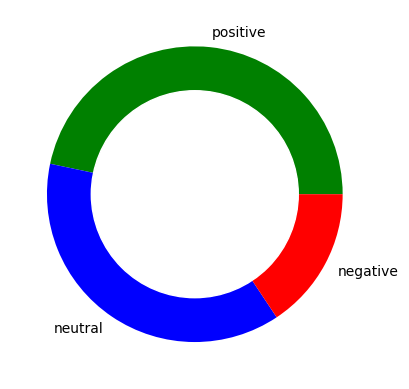

In [17]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


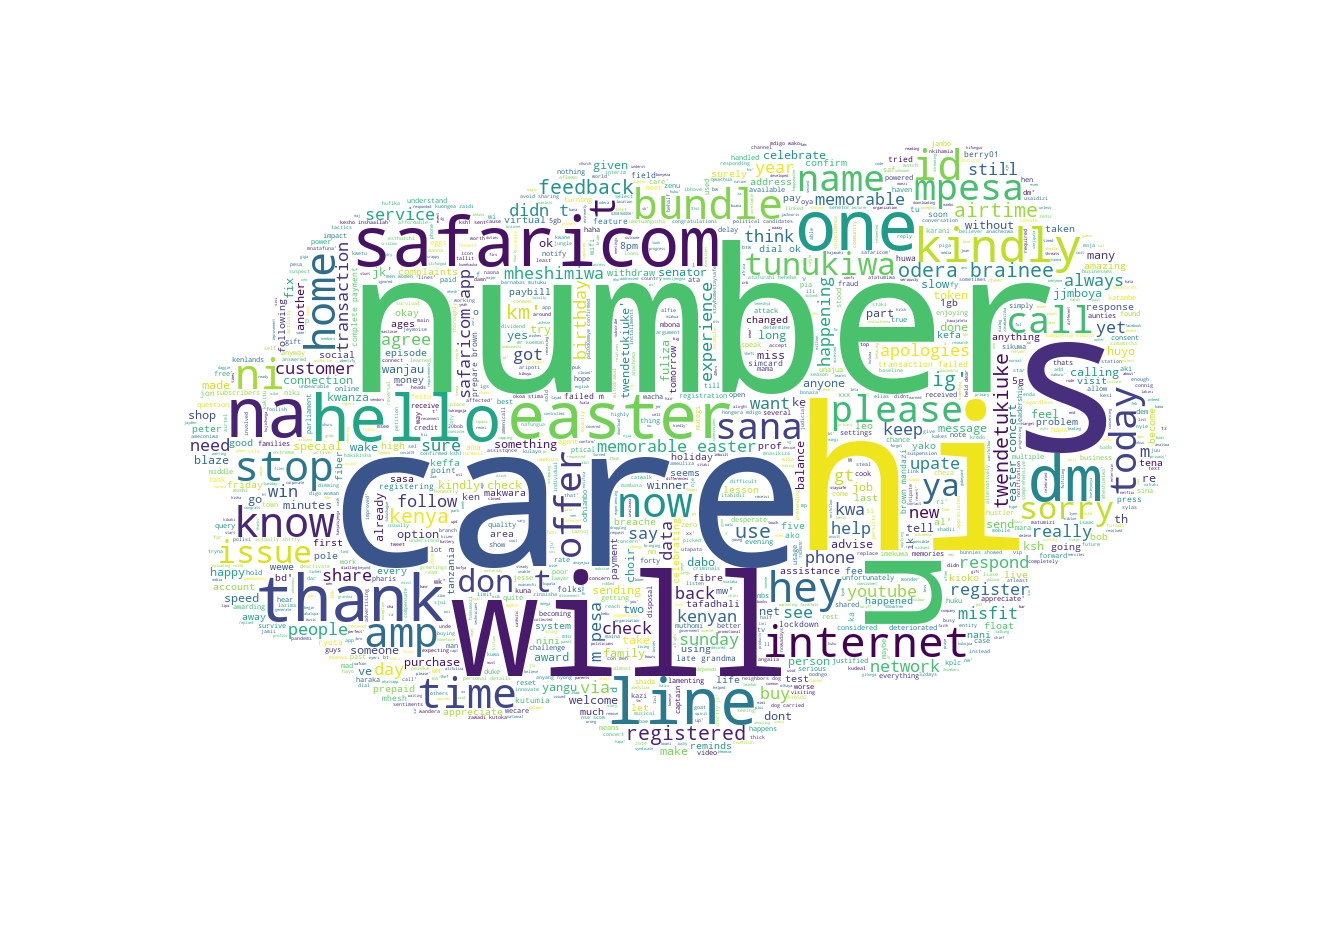

In [20]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


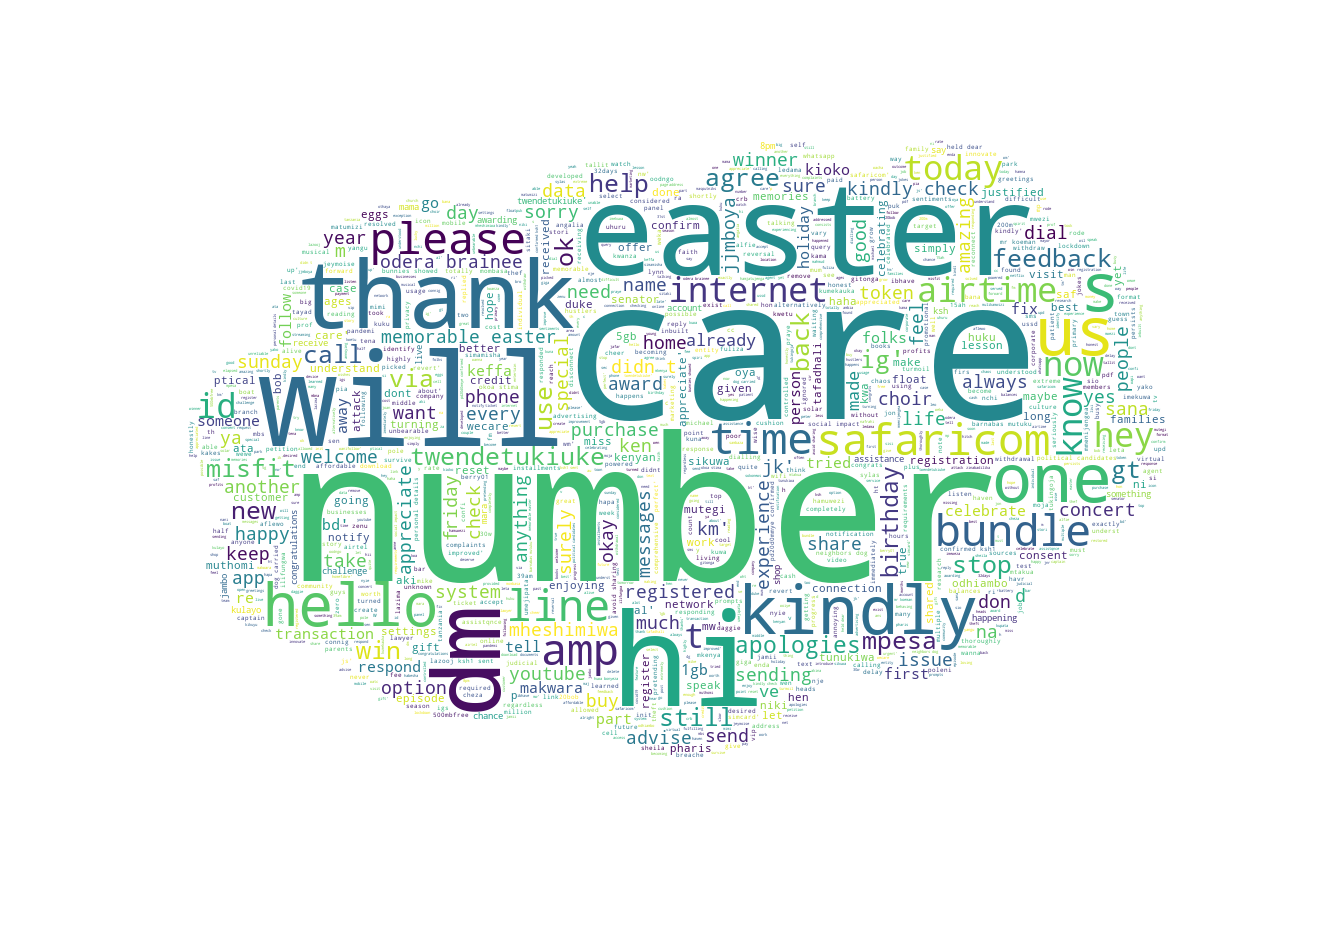

In [22]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


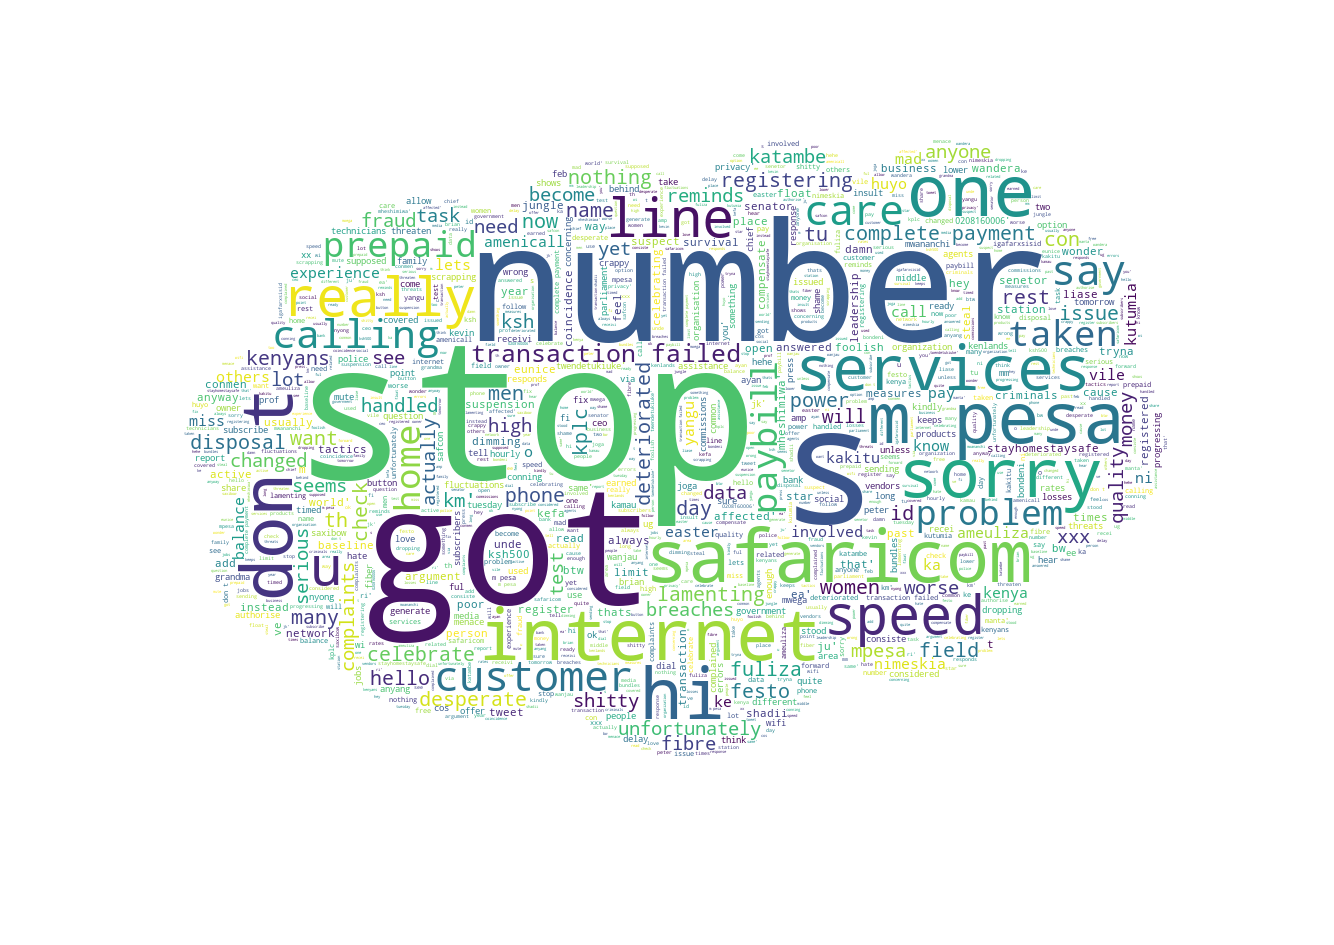

In [23]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


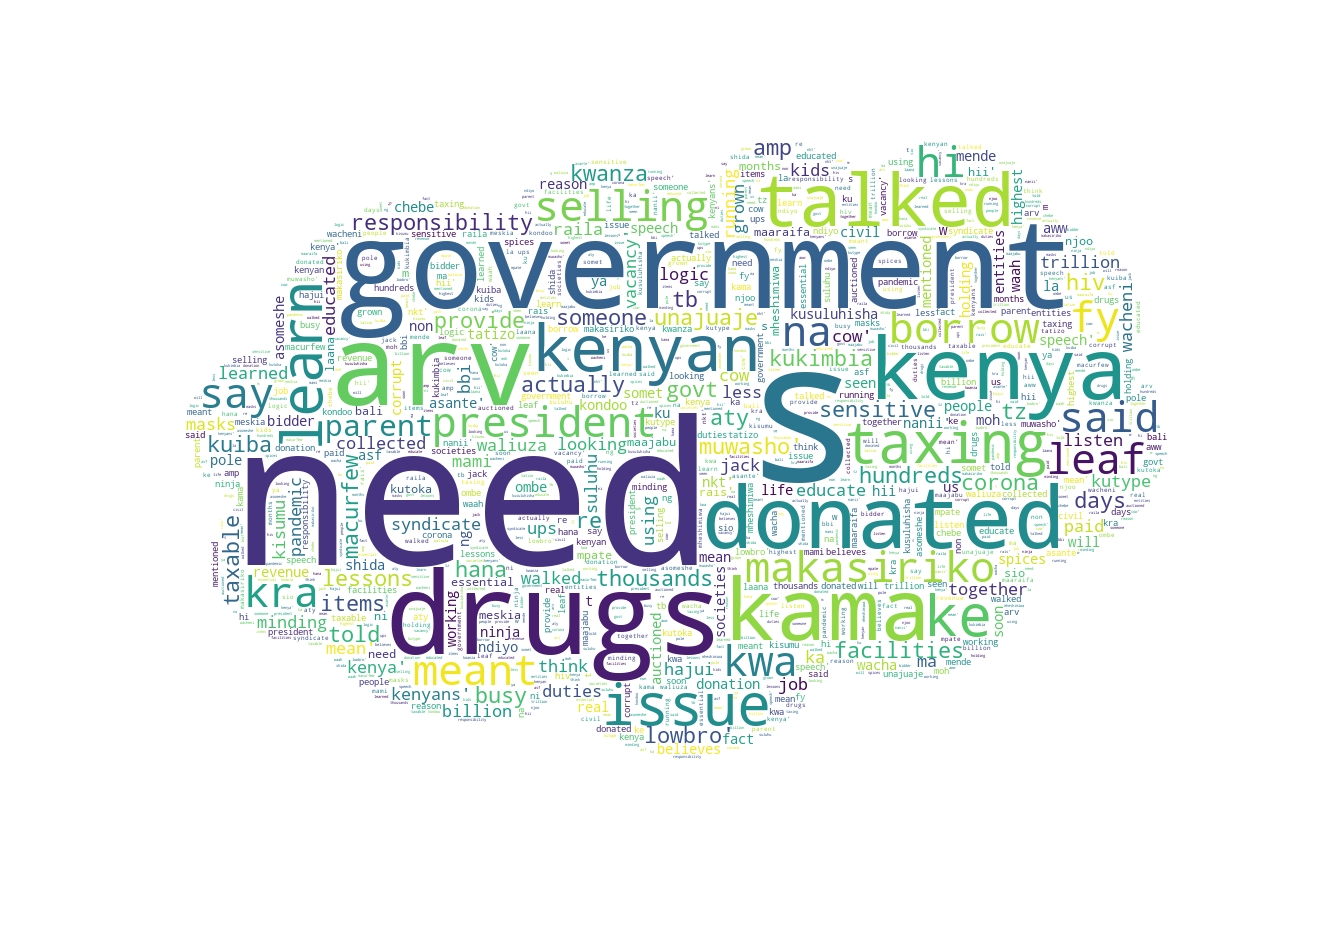

In [22]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [25]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [26]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,88.47
neutral,58.47
positive,82.28


In [27]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,15.12
neutral,9.49
positive,14.34


In [29]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [30]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [31]:
import nltk
nltk.download('stopwords')

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mutua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [33]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [34]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,@SafaricomPLC Nimeskia tu kutumia huyo custome...,nimeskia tu kutumia huyo customer care ameni...,0.0,0.00,negative,0.184,0.673,0.143,-0.2263,113,17,nimeskia tu kutumia huyo customer care ameni...,"[, nimeskia, tu, kutumia, huyo, customer, care...","[, nimeskia, tu, kutumia, huyo, customer, care...","[, nimeskia, tu, kutumia, huyo, custom, care, ..."
1,@SafaricomPLC So huwa mnasikiza conversation ...,so huwa mnasikiza conversation zetu zote na...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000,105,18,so huwa mnasikiza conversation zetu zote na...,"[, so, huwa, mnasikiza, conversation, zetu, zo...","[, huwa, mnasikiza, conversation, zetu, zote, ...","[, huwa, mnasikiza, convers, zetu, zote, na, u..."
2,RT @Asmali77: My Mombasa folks. I wanna cheer ...,my mombasa folks i wanna cheer up 4 of you w...,-0.1,0.55,positive,0.094,0.712,0.195,0.4019,131,26,my mombasa folks i wanna cheer up of you wi...,"[, my, mombasa, folks, i, wanna, cheer, up, of...","[, mombasa, folks, wanna, cheer, kshs, worth, ...","[, mombasa, folk, wanna, cheer, ksh, worth, ai..."
3,@Ohta_Ryota @KoneMoheavy @SafaricomPLC Try ##6...,ryota try 62 then press call,0.0,0.00,neutral,0.000,1.000,0.000,0.0000,37,6,ryota try then press call,"[, ryota, try, then, press, call]","[, ryota, try, press, call]","[, ryota, tri, press, call]"
4,@brianwairimu Hi there. Yes we can. We will re...,hi there yes we can we will respond shortl...,0.0,0.30,positive,0.000,0.769,0.231,0.4019,52,10,hi there yes we can we will respond shortl...,"[, hi, there, yes, we, can, we, will, respond,...","[, hi, yes, respond, shortly, js]","[, hi, ye, respond, shortli, js]"


In [35]:
tw_list.to_csv("SAFtweets.csv")

In [36]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

364 Number of reviews has 1143 words


In [38]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abl,accept,access,account,achez,activ,actual,add,address,...,zangu,zawadi,zenu,zero,zetu,ziko,zinabadilika,zinaisha,zote,zuri
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
number,35
care,32
easter,30
hi,30
safaricom,28
kindli,21
one,20
na,19
thank,18
dm,17


In [40]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [41]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('odera brainee', 8),
 ('memorable easter', 7),
 ('safaricom app', 6),
 ('kindly check', 5),
 ('thank feedback', 4),
 ('number registered', 4),
 ('kindly dm', 4),
 ('dm number', 4),
 ('sorry experience', 4),
 ('easter concert', 4),
 ('safaricom shop', 3),
 ('feedback ig', 3),
 ('check dm', 3),
 ('like know', 3),
 ('know number', 3),
 ('registered id', 3),
 ('virtual easter', 3),
 ('share number', 3),
 ('transaction failed', 3),
 ('failed pesa', 3)]

In [42]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('kindly dm number', 4),
 ('transaction failed pesa', 3),
 ('failed pesa complete', 3),
 ('pesa complete payment', 3),
 ('win 250 airtime', 3),
 ('250 airtime kindly', 3),
 ('airtime kindly dm', 3),
 ('memorable late grandma', 3),
 ('late grandma wake', 3),
 ('grandma wake prepare', 3),
 ('wake prepare brown', 3),
 ('prepare brown mandazi', 3),
 ('respond shortly js', 2),
 ('tell memorable easter', 2),
 ('memorable easter use', 2),
 ('easter use twendetukiuke', 2),
 ('use twendetukiuke award', 2),
 ('twendetukiuke award person', 2),
 ('stop registering phone', 2),
 ('registering phone numbers', 2)]